<a href="https://colab.research.google.com/github/sumankmaiti/All-in-one/blob/main/device_fingerprinting_trial2_sam_res_extra_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/dataset_and_generated_graph/same_resolution

/content/drive/MyDrive/dataset_and_generated_graph/same_resolution


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam

In [ ]:
 img = image.load_img("train_data/device0/plot0.png")

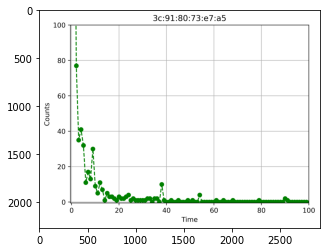

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread("train_data/device0/plot0.png").shape

(2264, 2922, 3)

In [ ]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [ ]:
train_dataset = train.flow_from_directory('train_data/', target_size=(400, 400), batch_size=16, class_mode='categorical')

Found 3609 images belonging to 9 classes.


In [ ]:
validation_dataset = validation.flow_from_directory('validation_data/', target_size=(400, 400), batch_size=16, class_mode='categorical')

Found 90 images belonging to 9 classes.


In [ ]:
train_dataset.class_indices

{'device0': 0,
 'device1': 1,
 'device2': 2,
 'device3': 3,
 'device4': 4,
 'device5': 5,
 'device6': 6,
 'device7': 7,
 'device8': 8}

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(400, 400, 3)),
                                    tf.keras.layers.MaxPool2D(2, 2),

                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid'),
                                    tf.keras.layers.Dense(9, activation='softmax'),
                                    ])

In [ ]:
import keras
input = keras.layers.Input(shape=(400, 400, 3)) #input_shape=(400, 400, 3)
conv_one = keras.layers.Conv2D(16, (3,3), activation = 'relu')(input)
pool_one = keras.layers.MaxPool2D(2, 2)(conv_one)

conv_two = keras.layers.Conv2D(32, (3,3), activation = 'relu')(pool_one)
pool_two = keras.layers.MaxPool2D(2, 2)(conv_two)

conv_three = keras.layers.Conv2D(64, (3,3), activation = 'relu')(pool_two)
pool_three = keras.layers.MaxPool2D(2, 2)(conv_three)

flat = keras.layers.Flatten()(pool_three)
dens = keras.layers.Dense(512, activation='linear')(flat)
rejected = keras.layers.Dense(1, activation='sigmoid')(dens)
accepted = keras.layers.Dense(9, activation='softmax')(dens)

model = keras.models.Model(inputs= input, outputs=[rejected, accepted])

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, steps_per_epoch=3, epochs=30, validation_data = validation_dataset, verbose=1)

Epoch 1/30


InvalidArgumentError: ignored

In [ ]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

TypeError: ignored

In [ ]:
# perturbed models of the original 
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
print(history.history['accuracy'])
print(history.history['val_accuracy'])

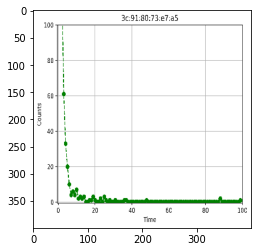

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[[1. 0. 0. 0. 0. 0. 0. 0. 0.]]


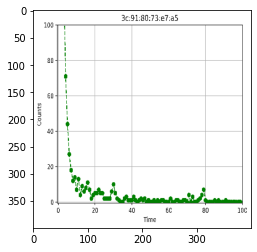

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]]


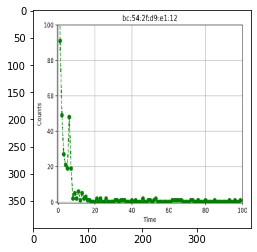

[[0. 1. 0. 0. 0. 0. 0. 0. 0.]]


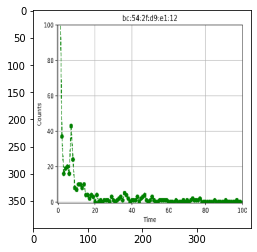

[[0. 1. 0. 0. 0. 0. 0. 0. 0.]]


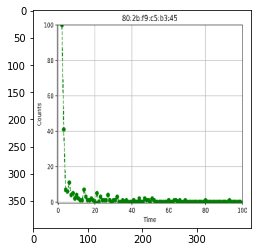

[[0. 0. 0. 0. 0. 0. 0. 0. 1.]]


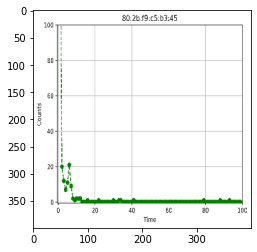

[[0. 0. 0. 0. 0. 0. 0. 0. 1.]]


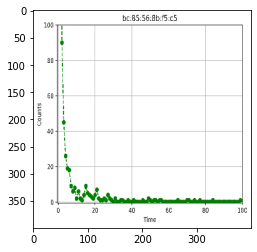

[[0. 0. 1. 0. 0. 0. 0. 0. 0.]]


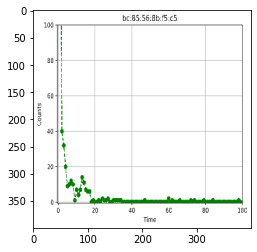

[[0. 0. 1. 0. 0. 0. 0. 0. 0.]]


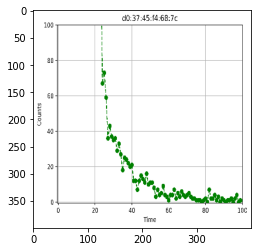

[[0. 0. 0. 0. 0. 1. 0. 0. 0.]]


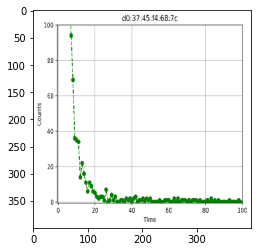

[[0. 0. 0. 0. 0. 1. 0. 0. 0.]]


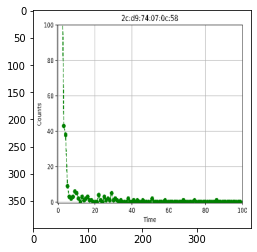

[[0. 0. 0. 0. 0. 0. 0. 1. 0.]]


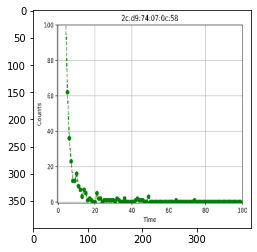

[[0. 0. 0. 0. 0. 0. 0. 1. 0.]]


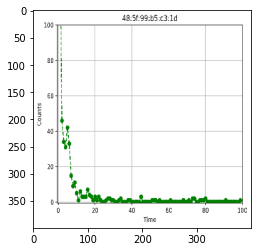

[[0. 0. 0. 0. 1. 0. 0. 0. 0.]]


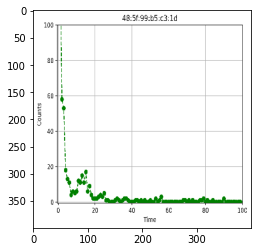

[[0. 0. 0. 0. 1. 0. 0. 0. 0.]]


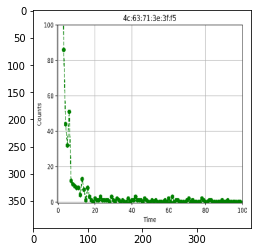

[[0. 0. 0. 1. 0. 0. 0. 0. 0.]]


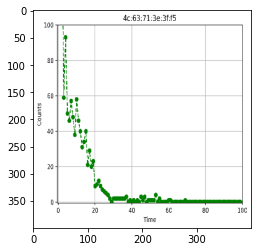

[[0. 0. 0. 1. 0. 0. 0. 0. 0.]]


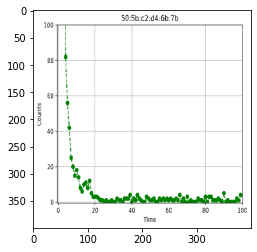

[[0. 0. 0. 0. 0. 0. 1. 0. 0.]]


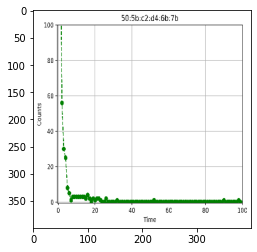

[[0. 0. 0. 0. 0. 0. 1. 0. 0.]]


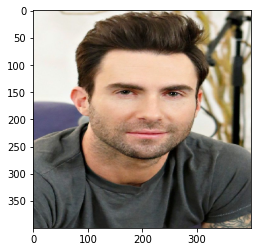

[[0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
dir_path = "test_data"
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+ i, target_size=(400, 400))
  plt.imshow(img)
  plt.show()

  x= image.img_to_array(img)
  x= np.expand_dims(x, axis=0)
  images= np.vstack([x])
  val = model.predict_proba(images)
  print(val)